In [175]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,8]

In [ ]:
def set_paper_style() -> None:
    #plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 26
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rcParams['axes.labelsize'] = 28
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.linewidth'] = 3
    plt.rcParams['xtick.labelsize'] = 28
    plt.rcParams['ytick.labelsize'] = 28
    plt.rcParams['legend.fontsize'] = 26
    plt.rcParams['figure.titlesize'] = 28
    plt.rcParams['lines.linewidth'] = 5.0
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.rcParams['ps.useafm'] = True
    plt.rcParams['pdf.use14corefonts'] = True
    
    
set_paper_style()

In [176]:
#now load the raw data
ausBeerProdData = pd.read_csv('/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/dataset/aus_beer_data.csv')

In [177]:
#check the head
ausBeerProdData.head(5)

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [178]:
#rename the column Monthly beer production to prodcution
ausBeerProdData.rename(columns={'Monthly beer production':'production'},inplace=True)

In [179]:
#keep the copy of the orginal data
ausBeerProdData_orginal = ausBeerProdData

In [180]:
#now lets seperate the year,month as that will play crusial in seasonal analysis
ausBeerProdData['date'] = pd.DatetimeIndex(ausBeerProdData['Month'])
ausBeerProdData['month'] = pd.DatetimeIndex(ausBeerProdData['Month']).month
ausBeerProdData['year'] = pd.DatetimeIndex(ausBeerProdData['Month']).year
ausBeerProdData

,Month,production,date,month,year
0,1956-01,93.2,1956-01-01,1,1956
1,1956-02,96.0,1956-02-01,2,1956
2,1956-03,95.2,1956-03-01,3,1956
3,1956-04,77.1,1956-04-01,4,1956
4,1956-05,70.9,1956-05-01,5,1956
...,...,...,...,...,...
471,1995-04,127.0,1995-04-01,4,1995
472,1995-05,151.0,1995-05-01,5,1995
473,1995-06,130.0,1995-06-01,6,1995
474,1995-07,119.0,1995-07-01,7,1995


In [181]:
#drop column Month
ausBeerProdData = ausBeerProdData.drop(columns=['Month'],axis=1)

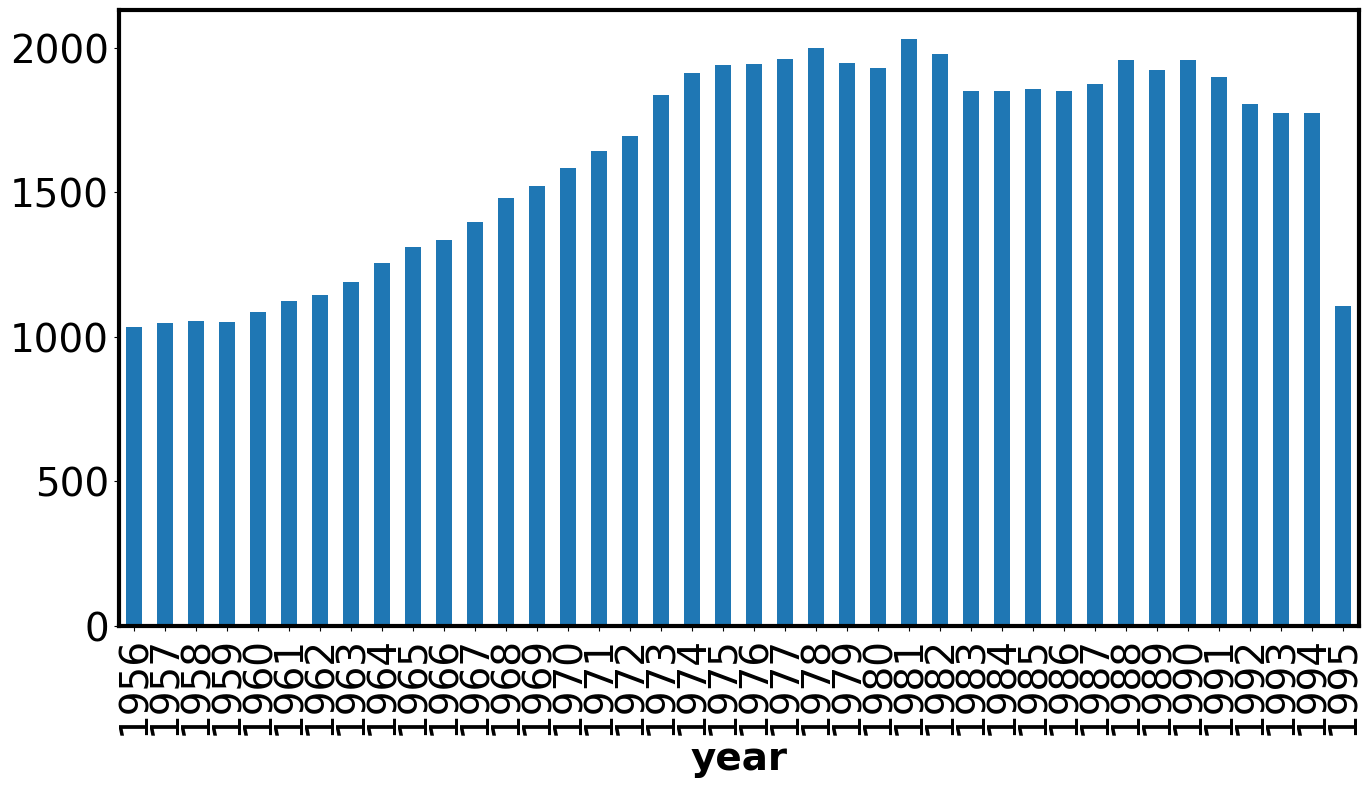

In [182]:
#now lets do some EDA on the data
#First will consider the yearly production of the beers
ausBeerProdData.groupby(['year']).sum()['production'].plot(kind='bar')

plt.show()

In [183]:
#lets check the yearly prodction and with its rolling mean
ausBeerProdData['rollingMean'] = ausBeerProdData.production.rolling(12).mean()

<AxesSubplot:title={'center':'trend checking'}, xlabel='Year', ylabel='Beer Production'>

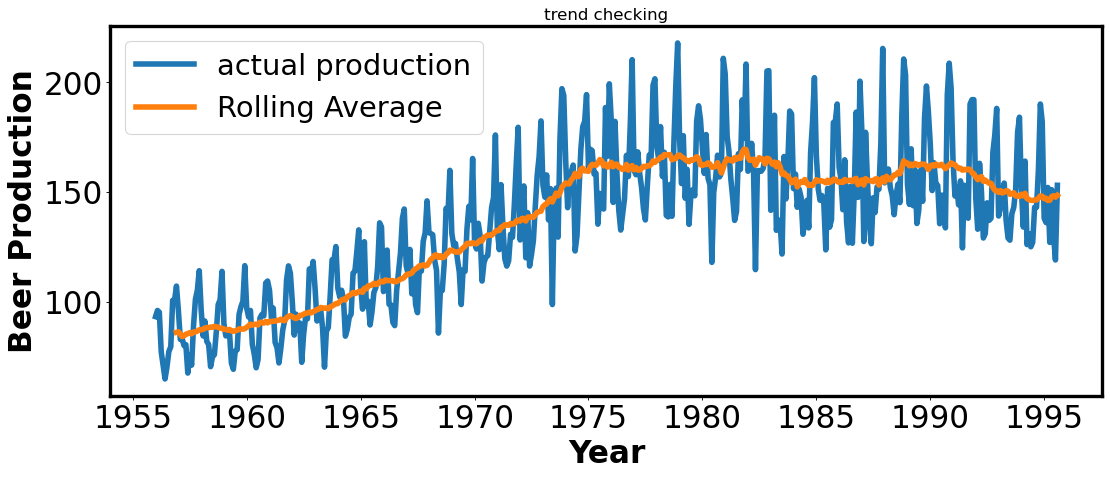

In [184]:
fig = plt.figure(figsize=(16, 6), dpi=80)
ax = sns.lineplot(data=ausBeerProdData,x='date',y='production',label='actual production')
ax.set(xlabel="Year", ylabel="Beer Production", title="trend checking")
sns.lineplot(data=ausBeerProdData,x='date',y='rollingMean',label = 'Rolling Average')

In [185]:
'''
we can visually confirm that data has the trend from above,
now we will re-confirm it by using ADF - augmented dicky Fuller test
after running this we can recofirm that the data has trend as the c_value is > 0.05 i.e 0.177
so we accept the null hypothesis and proceed to segregate the seasonality

Null Hypothesis (H0): is that the time series can be represented by a unit root (i.e. it is not stationary)
Alternate Hypotheis (H1): is that the time series does not have a unit root (i.e. it is stationary). Null Hypothesis is rejected.
'''
from statsmodels.tsa.stattools import adfuller

adfuller(ausBeerProdData['production'])[1]

0.17762099829132377

In [186]:
#now lets create the seperate lable if month comes under these following numbers(according to AUS calender)
'''
Fall - > december, January , february 
Autumn -> march , april , may
Winter -> june,july,aug
Spring ->spetember, october, november
'''
Fall = [12,1,2]
Autumn = [3,4,5]
Winter = [6,7,8]
Spring = [9,10,11]
#now lable them accordingly and assign them to new column season
#.loc --> to select the column with intended months in list
ausBeerProdData.loc[ausBeerProdData['month'].isin(Fall) ,'Season'] = 'Fall'
ausBeerProdData.loc[ausBeerProdData['month'].isin(Autumn),'Season']= 'Autumn'
ausBeerProdData.loc[ausBeerProdData['month'].isin(Winter),'Season'] = 'Winter'
ausBeerProdData.loc[ausBeerProdData['month'].isin(Spring),'Season']='Spring'
ausBeerProdData.head(20)

,production,date,month,year,rollingMean,Season
0,93.2,1956-01-01,1,1956,NaN,Fall
1,96.0,1956-02-01,2,1956,NaN,Fall
2,95.2,1956-03-01,3,1956,NaN,Autumn
3,77.1,1956-04-01,4,1956,NaN,Autumn
4,70.9,1956-05-01,5,1956,NaN,Autumn
5,64.8,1956-06-01,6,1956,NaN,Winter
6,70.1,1956-07-01,7,1956,NaN,Winter
7,77.3,1956-08-01,8,1956,NaN,Winter
8,79.5,1956-09-01,9,1956,NaN,Spring
9,100.6,1956-10-01,10,1956,NaN,Spring


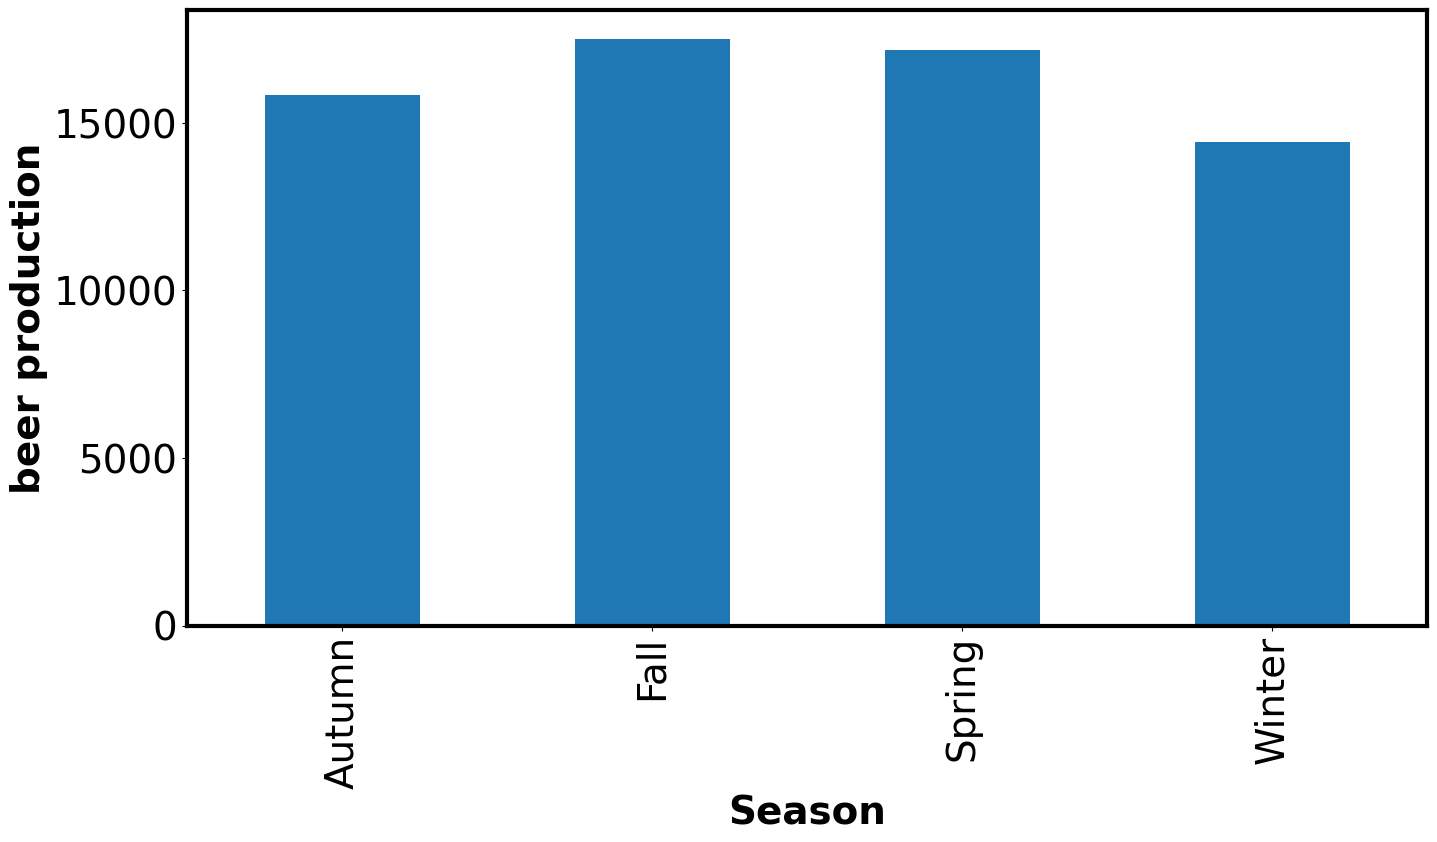

In [187]:
'''
we can clearly see the seasonal production High in Fall followed by spring
'''
ausBeerProdData.groupby(['Season']).sum()['production'].plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('beer production')
plt.show()

In [188]:
ausBeerProdData_cp = ausBeerProdData.copy().set_index('date')

In [189]:
ausBeerProdData_cp.head(5)

,production,month,year,rollingMean,Season
date,,,,,
1956-01-01,93.2,1,1956,NaN,Fall
1956-02-01,96.0,2,1956,NaN,Fall
1956-03-01,95.2,3,1956,NaN,Autumn
1956-04-01,77.1,4,1956,NaN,Autumn
1956-05-01,70.9,5,1956,NaN,Autumn


In [190]:
#lets create the piviot table
cummulative_seasonal = pd.pivot_table(ausBeerProdData_cp,index=ausBeerProdData_cp.index.month,columns=ausBeerProdData_cp.year
                                                     ,values = 'production', aggfunc='sum')
cummulative_seasonal.head(20)

year,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,...,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
date,,,,,,,,,,,,,,,,,,,,,
1,93.2,95.9,96.3,89.8,97.1,105.1,100.0,106.0,106.1,106.9,...,161.2,177.2,154.1,153.3,172.0,164.4,147.0,139.0,151.0,138.0
2,96.0,82.8,84.4,84.4,93.0,92.5,84.8,91.2,102.1,96.6,...,155.5,127.4,159.3,144.3,150.6,148.1,133.0,143.0,134.0,136.0
3,95.2,83.3,91.2,87.2,96.0,97.1,94.3,96.6,105.2,127.3,...,141.9,177.1,160.4,169.6,163.3,152.0,163.0,150.0,164.0,152.0
4,77.1,80.0,81.9,85.6,80.5,81.4,87.1,96.3,101.0,98.2,...,164.6,154.4,151.9,143.7,153.7,144.1,150.0,154.0,126.0,127.0
5,70.9,80.4,80.5,72.0,76.1,79.1,90.3,88.2,84.3,100.2,...,136.2,135.2,148.4,160.1,152.9,155.0,129.0,137.0,131.0,151.0
6,64.8,67.5,70.4,69.2,69.9,72.1,72.4,70.2,87.5,89.4,...,126.8,126.4,139.6,135.6,135.5,124.5,131.0,129.0,125.0,130.0
7,70.1,75.7,74.8,77.5,73.6,78.7,84.9,86.5,92.7,95.3,...,152.5,147.3,148.2,141.8,148.5,153.0,145.0,128.0,127.0,119.0
8,77.3,71.1,75.9,78.1,92.6,87.1,92.7,88.2,94.4,104.2,...,126.6,140.6,153.5,159.9,148.4,146.0,137.0,140.0,143.0,153.0
9,79.5,89.3,86.3,94.3,94.2,91.4,92.2,102.8,113.0,106.4,...,150.1,152.3,145.1,145.7,133.6,138.0,138.0,143.0,143.0,NaN


Text(0.5, 1.0, 'Beer Production month/year to ascertain Seasonality')

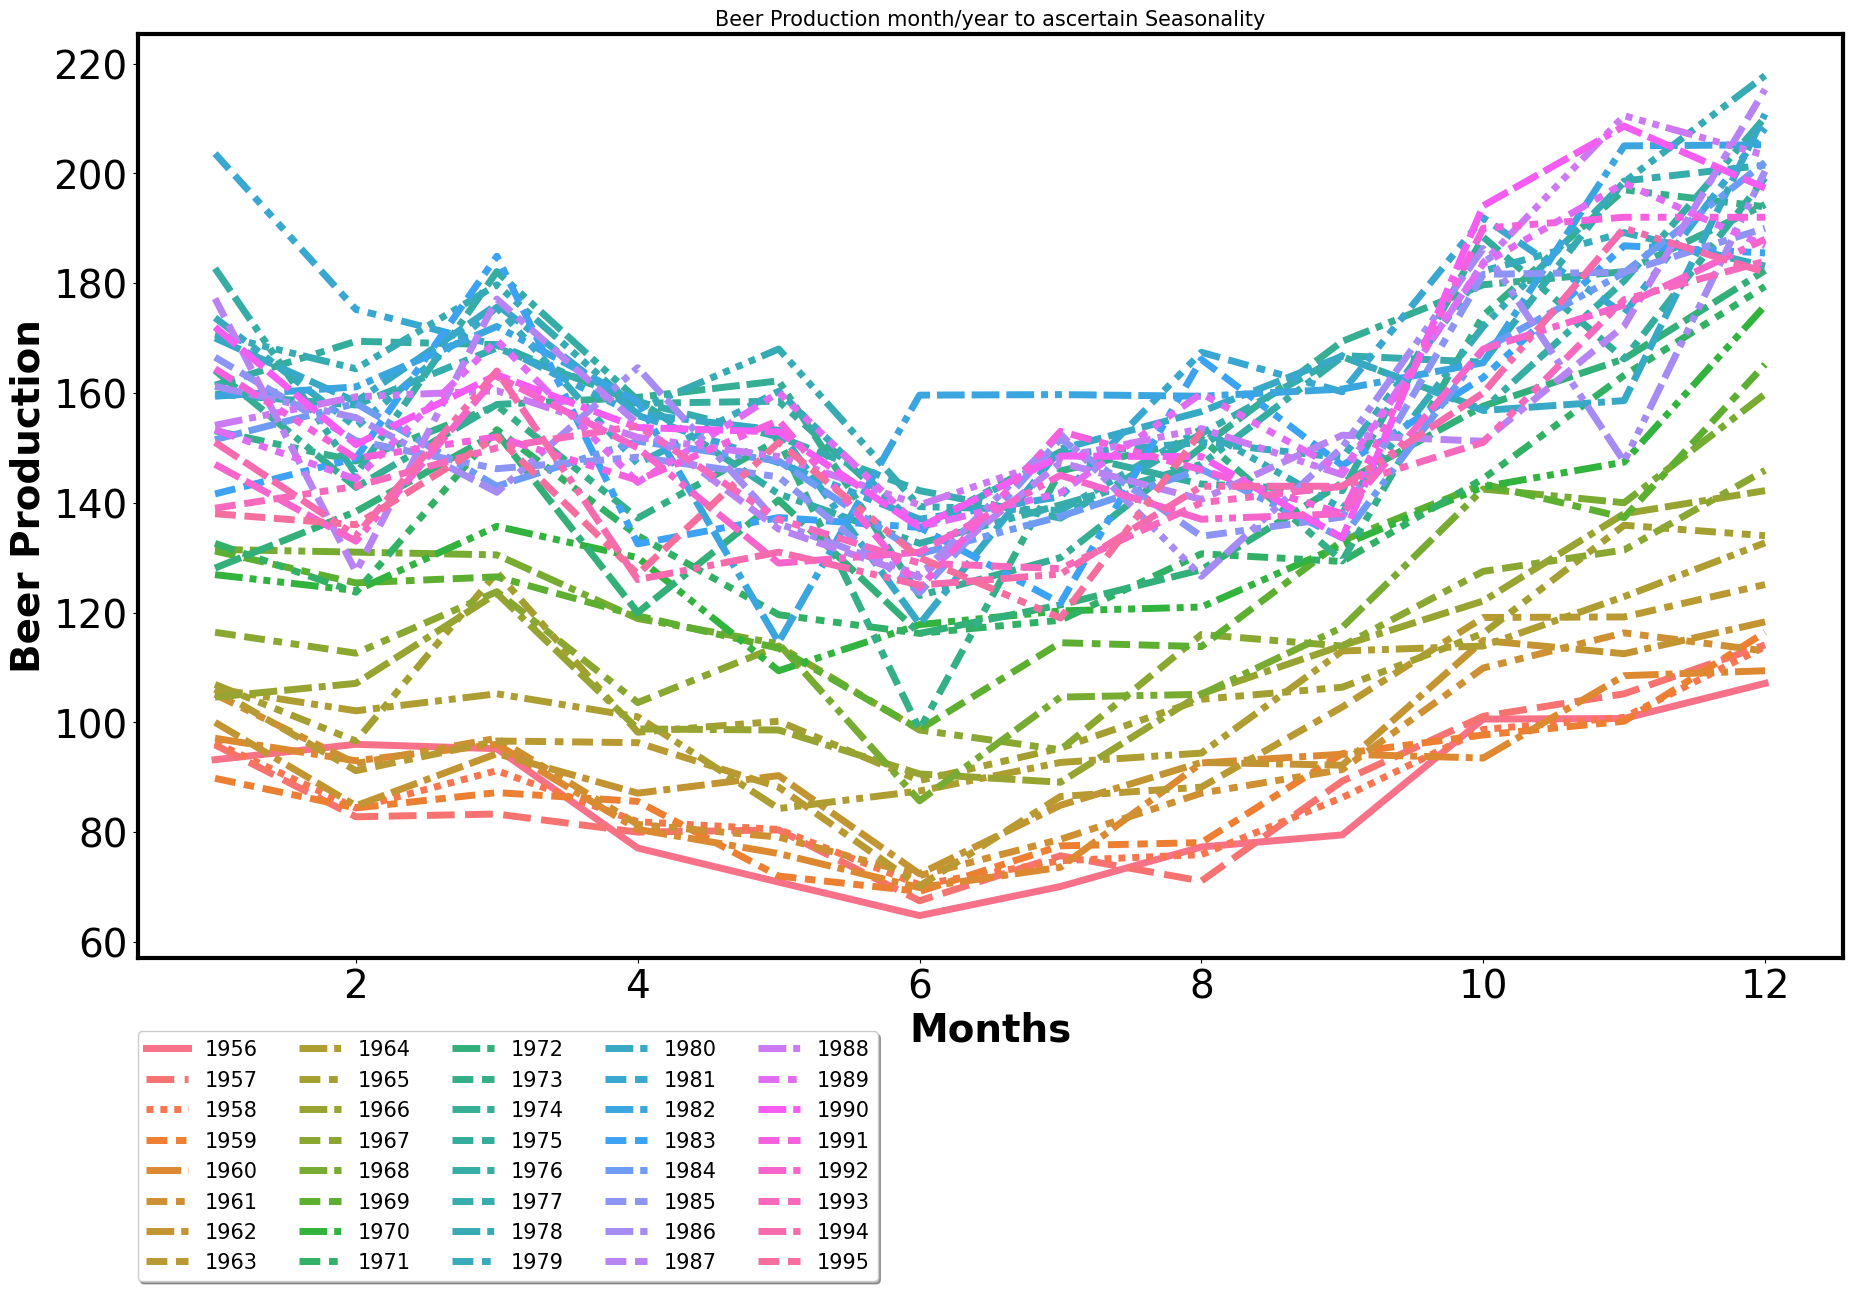

In [191]:
fig, ax = plt.subplots(figsize=(22, 12))
sns.lineplot(data=cummulative_seasonal)
leg=plt.legend(bbox_to_anchor=(0.,-0.350, 1., 1.102), loc=3, numpoints=1, ncol=5 , borderaxespad=0., fancybox=True, shadow=True,prop={'size':15})
ax.set_xlabel("Months")
ax.set_ylabel("Beer Production")
ax.set_title("Beer Production month/year to ascertain Seasonality")

In [192]:
#lets do the seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose




In [196]:
seasonal = ausBeerProdData.copy().set_index('date').sort_index()
seasonal.head()

,production,month,year,rollingMean,Season
date,,,,,
1956-01-01,93.2,1,1956,NaN,Fall
1956-02-01,96.0,2,1956,NaN,Fall
1956-03-01,95.2,3,1956,NaN,Autumn
1956-04-01,77.1,4,1956,NaN,Autumn
1956-05-01,70.9,5,1956,NaN,Autumn


In [197]:
productionData = seasonal[['production']].copy()
productionData.sort_index()
result = seasonal_decompose(productionData,model='multiplicative')

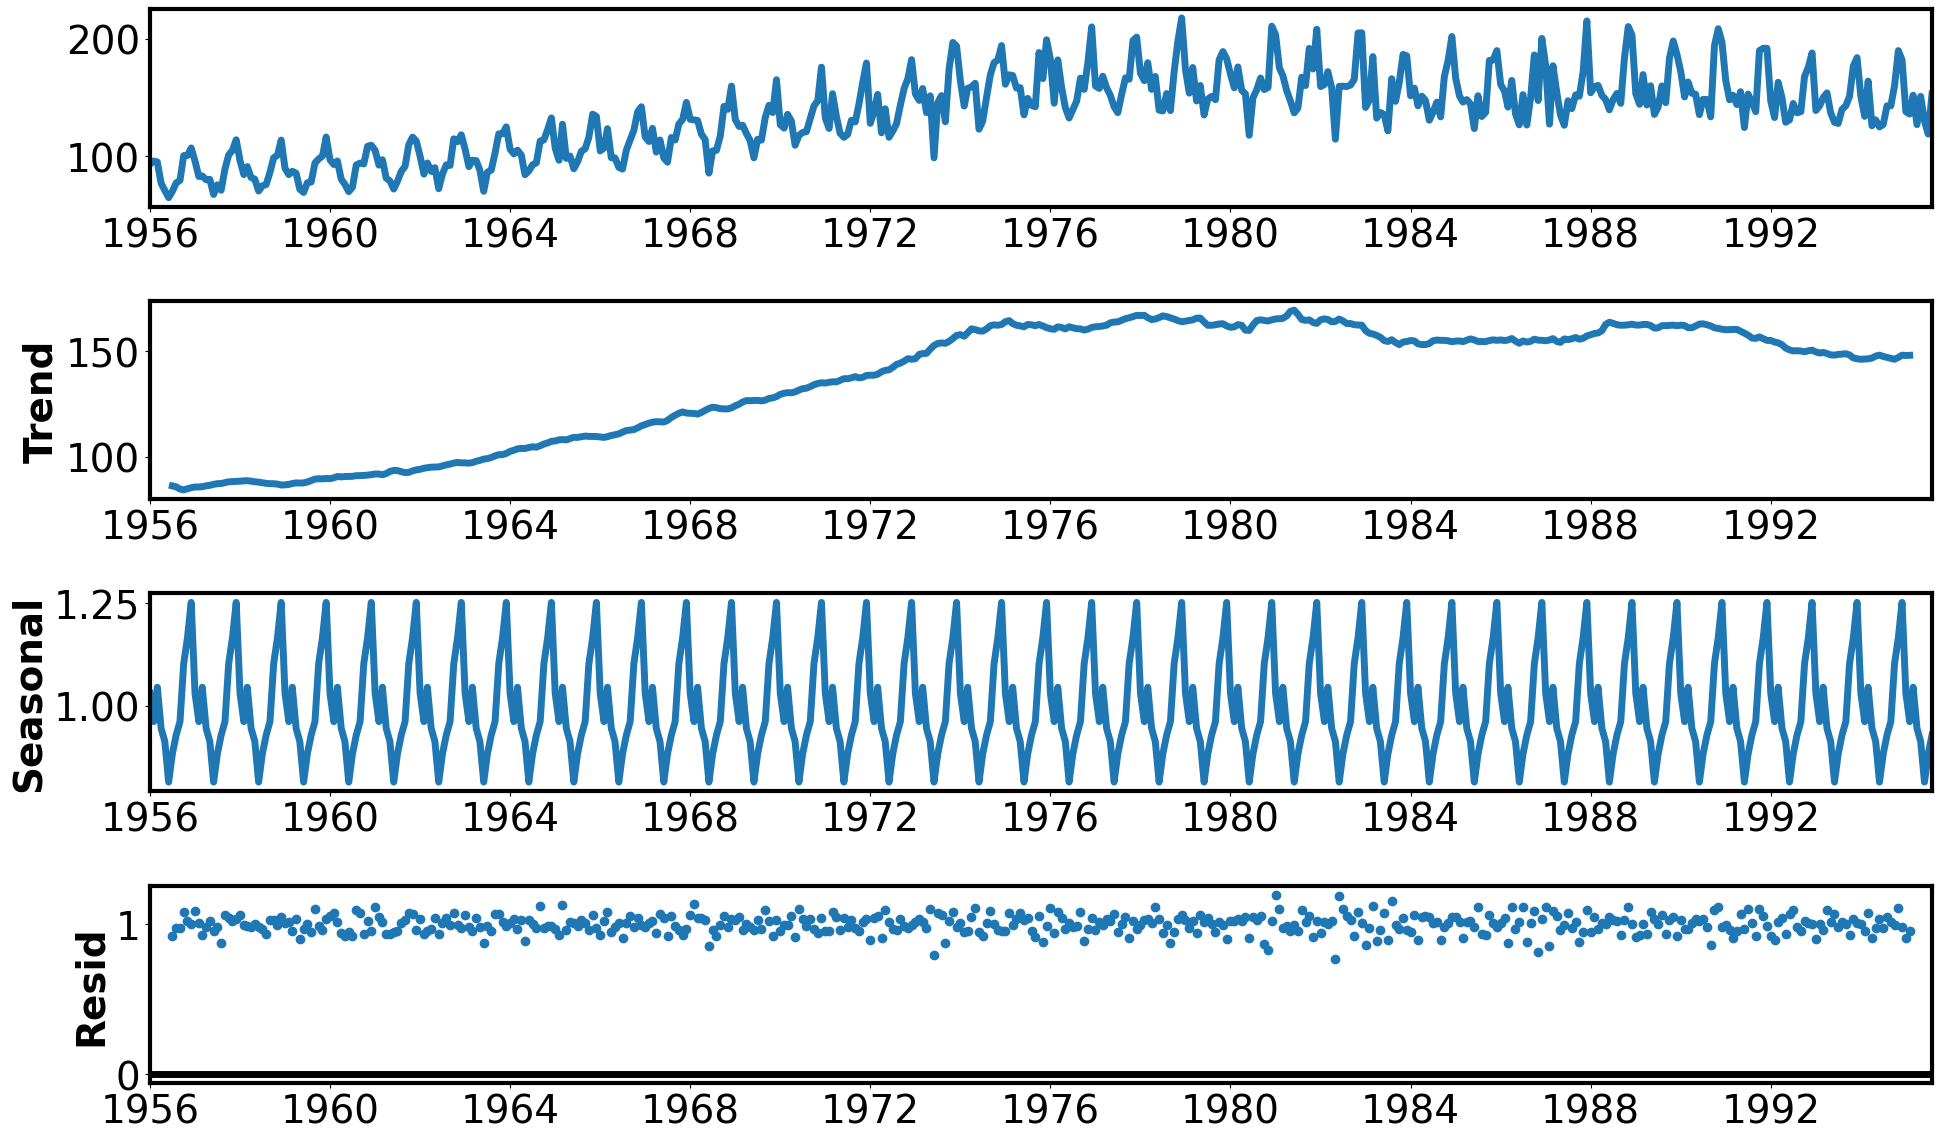

In [205]:
trend = result.trend
season = result.seasonal
noise = result.resid

fig = result.plot()
fig.set_size_inches((20, 12))
fig.tight_layout()
plt.show()

In [206]:
'''
now lets proceed to model selection, here we will concentrate on 2 models
prohet -- by facebook, best for sasonality time series
SARIMA - seasonal Autoregression integrated moving average, its extenstion of ARIMA, simple with high accuracy
XGBOX -- Extreme gradient boosting algorithm, high accuracy complex to work upon and works on categorical data, and need large data
LSTM --> long short-term memory is nural network deep learning model, more complex and need large data
'''
#before that we will split the data into train , validate and test (60-20-20)
train_data_indices = int(0.6*len(ausBeerProdData))
val_data_indices = int(0.2*len(ausBeerProdData))
train_data = ausBeerProdData.iloc[:train_data_indices]
validation_data = ausBeerProdData.iloc[train_data_indices:val_data_indices]
test_data = ausBeerProdData[train_data_indices+val_data_indices:]


In [208]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for Cython>=0.22 from https://files.pythonhosted.org/packages/d7/40/ab311db246d44334eefbe5b52729da959088ff213b4f8e3a97b613f37ace/Cython-3.0.9-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached Cython-3.0.9-cp311-cp311-macosx_10_9_x86_64.whl.metadata (3.2 kB)
  Obtaining dependency information for cmdstanpy==0.9.5 from https://files.pythonhosted.org/packages/e3/e2/204c9c6beaf9e05ad28bd589c154afff35dffa6166d76841d3c0dec6c1e3/cmdstanpy-0.9.5-py3-none-any.whl.metadata
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Obtaining dependency information for pystan>=2.14 from https://files.pythonhosted.org/packages/36/dc/e84dcee309f00384674bd4571085a1daada182552a0fbc83231672539b4b/pystan-3.9.0-py3-none-any.whl.metadata
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Obtaining dependency information for setuptools-git>=1.2 from https

  Obtaining dependency information for marshmallow<4.0,>=3.10 from https://files.pythonhosted.org/packages/38/04/37055b7013dfaaf66e3a9a51e46857cc9be151476a891b995fa70da7e139/marshmallow-3.21.1-py3-none-any.whl.metadata
  Using cached marshmallow-3.21.1-py3-none-any.whl.metadata (7.2 kB)
  Obtaining dependency information for webargs<9.0,>=8.0 from https://files.pythonhosted.org/packages/ad/52/9de0e7cc7dfa1352f5923549c06b8126fede748e6c07ecb37bc7c53331d3/webargs-8.4.0-py3-none-any.whl.metadata
  Using cached webargs-8.4.0-py3-none-any.whl.metadata (8.0 kB)
Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
Using cached Cython-3.0.9-cp311-cp311-macosx_10_9_x86_64.whl (3.1 MB)
Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
Using cached httpstan-4.10.0-cp311-cp311-macosx_10_15_x86_64.whl (36.0 MB)
Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
Using cached marsh